# Analyzing Hacker News Posts

This is an exploratory Jupyter notebook that aims to pull insights from posts submitted to a technology site called [Hacker News](https://news.ycombinator.com/). The aim is to understand the optimal time to post two types of content: `Ask HN` and `Show HN`. We will determine optimal times by finding the average number of comments for each type of post at each hour in a 24-hour cycle.


<img src="https://zox.news/wp-content/uploads/2021/04/hn-dirt-big.png" alt="Kitten" title="Hacker news" 
     width='50%' />


## Overview

[Hacker News](https://news.ycombinator.com/) is a site started by the startup incubator, [Y Combinator](https://www.ycombinator.com/), where user-submitted stories (known as "posts") receive votes and comments, similar to Reddit.


## Dataset Information

The original dataset can be found [here](https://www.kaggle.com/hacker-news/hacker-news-posts). For this analysis, the data was reduced from almost *300,000 rows* to approximately *20,000 rows*. We did this by eliminating submissions that didn't receive any comments and then randomly sampling from the remaining submissions. The `7` columns in the dataset are described below:

- `id`:- Unique identifier from Hacker News for the post

- `title`:- Title of the post

- `url`:- The URL that the posts links to, if the post has a URL

- `num_points`:- Number of points the post acquired (calculated as *total upvotes - total downvotes*)

- `num_comments`:- Number of comments on the post

- `author`:- Username of the person who submitted the post

- `created_at`:- Date and time of the post's submission

## Categories of Interest

We're specifically interested in posts with titles that begin with either Ask HN or Show HN. 

- Users submit `Ask HN` posts to ask the Hacker News community a specific question, for example:

```
Ask HN: How to improve my personal website?
Ask HN: Am I the only one outraged by Twitter shutting down share counts?

```
- Users submit `Show HN` posts to show the Hacker News community a project, product, or just something interesting. Below are a few examples:

```
Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'
Show HN: Something pointless I made

```

## Importing Libraries
As we progress in this project, we will need to read files, work with dates and times, and create visualizations. For these three aims, we import python's `reader` and `datetime` modules, and make charts using `seaborn`.

Notably, this notebook doesn't use the `Pandas` library. That is because I'm trying to learn how to work with data using simple for loops and base Python libraries, prior to easing the workload with `Pandas`.

In [131]:
from csv import reader
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def extract_data(filepath):
    """Open a .csv file and convert it to a list of lists. 

    Keyword arguments:
    filepath -- Path to a .csv file.

    Output(s):
    [0] -- Header row of the .csv file, as a list. 
    [1] -- Rows of the .csv file, as a list of lists.
    """

    opened_file = open(filepath)
    read_file = reader(opened_file)
    result = list(read_file)
    return result[0], result[1:]

In [20]:
headers, hn = extract_data('./hacker_news.csv')

In [21]:
print(headers)

print(hn[:5])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


We've now imported our .csv file and saved the data (excluding headers) to the `hn` variable. We're now ready to begin our analysis.

First, we'll split the data into `Ask HN` and `Show HN` posts.

It's generally a bad idea to iterate through datasets, but since we're not using `Pandas` in this notebook, there are limited options.

#### Filter Posts for 'Ask' or 'Show HN'

In [23]:
# Initiate empty lists for each type of post
ask_posts = []
show_posts = []
other_posts = []

In [25]:
def sort_data(list_of_posts):
    """Categorize a list of lists into Ask, Show, and Other posts.  

    Keyword arguments:
    list_of_posts -- A list of lists containing only data rows, and not headers. 

    Output(s): None
    """
    for row in list_of_posts:
        title = row[1]
        if title.lower().startswith('ask hn'):
            ask_posts.append(row)
        elif title.lower().startswith('show hn'):
            show_posts.append(row)
        else:
            other_posts.append(row)

In [26]:
sort_data(hn)

In [27]:
print(f"There are {len(ask_posts)} ask posts, {len(show_posts)} show posts, and {len(other_posts)} other posts.")

There are 1744 ask posts, 1162 show posts, and 17194 other posts.


#### Identify the total number of comments in `Ask HN` and `Show HN` posts.

In [30]:
def count_comments(posts_list):
    """Count the number of comments for each post.

    Keyword arguments:
    posts_list -- A list of lists containing only data rows, and not headers.

    Output(s):
    total_comments -- An integer representing the total number of comments.
    """
    total_comments = 0
    for row in posts_list:
        num_comments = int(row[4])
        total_comments += num_comments
    return total_comments

In [31]:
total_ask_comments = count_comments(ask_posts)
total_show_comments = count_comments(show_posts)

In [32]:
print(f"Total number of comments for Ask HN posts: {total_ask_comments}")
print(f"Average number of comments for Ask HN posts: {total_ask_comments / len(ask_posts)}")

print(f"Total number of comments for Show HN posts: {total_show_comments}")
print(f"Average number of comments for Show HN posts: {total_show_comments / len(show_posts)}")


Total number of comments for Ask HN posts: 24483
Average number of comments for Ask HN posts: 14.038417431192661
Total number of comments for Show HN posts: 11988
Average number of comments for Show HN posts: 10.31669535283993


It appears that 'Ask' comments receive more comments on average.

#### What post time is optimal to maximize comments on `Ask HN` and `Show HN` posts?

In [34]:
def count_comments(posts_list):
    """Distill the list of lists into a two-column list of lists.

    Keyword arguments:
    posts_list -- A list of lists containing only data rows, and not headers.

    Output(s):
    result_list -- A list of lists containing the number of comments, and time of posting, for each post.
    """
    result_list = []
    for row in posts_list:
        created_at = row[6]
        num_comments = int(row[4])
        result_list.append([created_at, num_comments])
        
    return result_list

In [35]:
def counts_by_hour(result_list):
    """Count the average number of comments for posts at each time in a 24-hour cycle, by building frequency tables.

    Keyword arguments:
    result_list -- A list of lists containing only data rows, and not headers.

    Output(s):
    0. counts_by_hour -- A dictionary containing all times in a 24-hour period, as well as the number of posts for each hour.
    1. comments_by_hour -- A dictionary containing all times in a 24-hour period, as well as the average number of comments per post.
    """
    counts_by_hour = {}
    comments_by_hour = {}

    for row in result_list:
        time = row[0]
        num_comments = row[1]
        date, hour = time.split()
        hour_dt = dt.datetime.strptime(hour, '%H:%M')
        final_hour = hour_dt.strftime('%H')
        
        if final_hour not in counts_by_hour:
            counts_by_hour[final_hour] = 1
            comments_by_hour[final_hour] = num_comments
        else:
            counts_by_hour[final_hour] += 1
            comments_by_hour[final_hour] += num_comments

    return counts_by_hour, comments_by_hour

Now let's take the `Ask HN` and `Show HN` datasets, and consolidate them so they each have just two columns: `created_at` and `num_comments`

In [36]:
ask_hn_small = count_comments(ask_posts)
show_hn_small = count_comments(show_posts)

In [40]:
print(ask_hn_small[0])
print(show_hn_small[0])

['8/16/2016 9:55', 6]
['11/25/2015 14:03', 22]


Now we can go through the `Ask HN` and `Show HN` datasets and pull out the number of posts made, per hour, and the average number of comments on those posts, for each year.

In [45]:
ask_hn_counts, ask_hn_comments = counts_by_hour(ask_hn_small)
show_hn_counts, show_hn_comments = counts_by_hour(show_hn_small)

Let's try to answer our question. Namely, what times have a high amount of activity for both posts and the number of comments on posts, for both `Ask HN` and `Show HN` content?

In [47]:
print("Ask HN posts per hour.")
print(ask_hn_counts)
print("Show HN posts per hour.")
print(show_hn_counts)

Ask HN posts per hour.
{'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}
Show HN posts per hour.
{'14': 86, '22': 46, '18': 61, '07': 26, '20': 60, '05': 19, '16': 93, '19': 55, '15': 78, '03': 27, '17': 93, '06': 16, '02': 30, '13': 99, '08': 34, '21': 47, '04': 26, '11': 44, '12': 61, '23': 36, '09': 30, '01': 28, '10': 36, '00': 31}


For `Ask HN`, it looks like most posts are made at 6pm and at 9pm. 

For `Show HN`, it looks like most posts are made at 1pm and 4pm. 

In [48]:
print("Ask HN comments per hour.")
print(ask_hn_comments)
print("Show HN comments per hour.")
print(show_hn_comments)

Ask HN comments per hour.
{'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}
Show HN comments per hour.
{'14': 1156, '22': 570, '18': 962, '07': 299, '20': 612, '05': 58, '16': 1084, '19': 539, '15': 632, '03': 287, '17': 911, '06': 142, '02': 127, '13': 946, '08': 165, '21': 272, '04': 247, '11': 491, '12': 720, '23': 447, '09': 291, '01': 246, '10': 297, '00': 487}


Wow! For `Ask HN`, it looks like most comments are made at 3pm. 

For `Show HN`, it looks like most posts are made at 1pm and 2pm. 

Our output is quite ugly, and the dictionaries are not sorted, making them difficult to read. Let's try to clean up the output so that the numbers are sorted by time, and output one row at a time.

In [53]:
def nice_output(freq_table):
    """Take a frequency table, and output a clean, sorted print statement.

    Keyword arguments:
    freq_table -- A dictionary containing all times in a 24-hour period, as well as an associate value.

    Output(s): None
    """
    print_statement = ""
    for hour in sorted(freq_table):
        print_statement += f"{hour}: {freq_table[hour]}\n"

    print(print_statement)

In [54]:
nice_output(ask_hn_counts)

00: 55
01: 60
02: 58
03: 54
04: 47
05: 46
06: 44
07: 34
08: 48
09: 45
10: 59
11: 58
12: 73
13: 85
14: 107
15: 116
16: 108
17: 100
18: 109
19: 110
20: 80
21: 109
22: 71
23: 68



Fantastic! Now that we can sort our frequency tables and output them in a clean manner, let's next compute the _average_ number of comments, per post, per hour.

In [80]:
def compute_average(posts_per_hour, comments_per_hour):
    """Takes two frequency tables, outputs a single frequency table with the average of the two.

    Keyword arguments:
    posts_per_hour -- A frequency table (as a dictionary) containing hour: value pairs.
    comments_per_hour -- A frequency table (as a dictionary) containing hour: value pairs.

    Output(s):
    avg_by_hour -- A list of lists with hours and values, sorted from most comments/post to least.
    """
    
    avg_by_hour = []

    for hour in posts_per_hour:
        comments = comments_per_hour[hour]
        counts = posts_per_hour[hour]

        avg_by_hour.append([comments/counts, hour])
    
    return sorted(avg_by_hour, reverse=True)

In [81]:
ask_hn_avg = compute_average(ask_hn_counts, ask_hn_comments)
show_hn_avg = compute_average(show_hn_counts, show_hn_comments)

### Top 5 Hours to garner comments on `Ask HN` and `Show HN` posts

In [84]:
print("Ask HN posts.")
ask_hn_avg[:5]

Ask HN posts.


[[38.5948275862069, '15'],
 [23.810344827586206, '02'],
 [21.525, '20'],
 [16.796296296296298, '16'],
 [16.009174311926607, '21']]

In [85]:
print("Show HN posts.")
show_hn_avg[:5]

Show HN posts.


[[15.770491803278688, '18'],
 [15.709677419354838, '00'],
 [13.44186046511628, '14'],
 [12.416666666666666, '23'],
 [12.391304347826088, '22']]

In [99]:
def beautiful_output(listed_lists):
    """Take a list of lists, and print beautiful text.

    Keyword arguments:
    listed_lists -- A list showing average comments/post for each hour of the day.

    Output(s): None
    """

    for row in listed_lists[:5]:
        hour = int(row[1])
        count = int(row[0])
        print(f"{hour}: {count} comments/post")

In [100]:
print("Show HN posts.")
beautiful_output(show_hn_avg)

Show HN posts.
18: 15 comments/post
0: 15 comments/post
14: 13 comments/post
23: 12 comments/post
22: 12 comments/post


In [101]:
print("Ask HN posts.")
beautiful_output(ask_hn_avg)

Ask HN posts.
15: 38 comments/post
2: 23 comments/post
20: 21 comments/post
16: 16 comments/post
21: 16 comments/post


### Plots

In [122]:
ask_array = np.array(ask_hn_avg).astype(float)
show_array = np.array(show_hn_avg).astype(float)

In [123]:
ask_array[:5, 0]

array([38.59482759, 23.81034483, 21.525     , 16.7962963 , 16.00917431])

Text(0, 0.5, 'Average No. of Comments per Post')

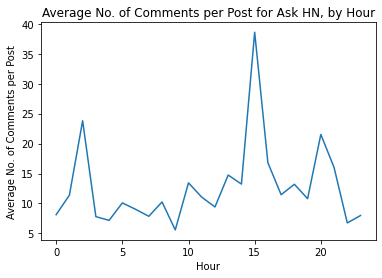

In [134]:
sns.lineplot(data=ask_array, x=ask_array[:,1], y=ask_array[:,0]).set_title("Average No. of Comments per Post for Ask HN, by Hour")
plt.xlabel("Hour")
plt.ylabel("Average No. of Comments per Post")

Text(0, 0.5, 'Average No. of Comments per Post')

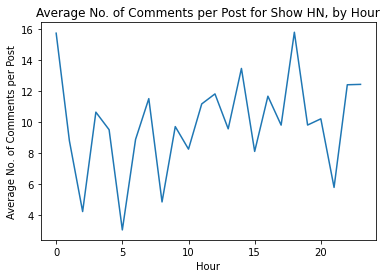

In [135]:
sns.lineplot(data=show_array, x=show_array[:,1], y=show_array[:,0]).set_title("Average No. of Comments per Post for Show HN, by Hour")
plt.xlabel("Hour")
plt.ylabel("Average No. of Comments per Post")